In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

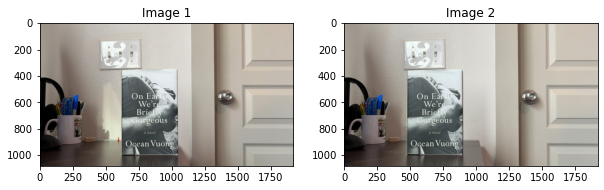

In [11]:
def capture_images():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    images = []
    for i in range(2):
        cv2.waitKey(2500)
        ret, frame = cap.read()
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            images.append(frame_rgb)
            cv2.imshow('Capture Image', frame)
            cv2.waitKey(2500)
        else:
            print("Failed to capture image")

    cap.release()
    cv2.destroyAllWindows()

    # Display captured images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].set_title(f'Image {i+1}')
    plt.show()

    return images

# Capture images
images = capture_images()


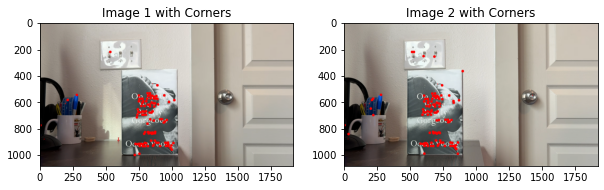

In [20]:
def detect_corners(images):
    corner_images = []
    all_corners = []
    for img in images:
        img_copy = img.copy()
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
        corners = np.int0(corners)

        img_corners = []
        for i in corners:
            x, y = i.ravel()
            cv2.circle(img_copy, (x, y), radius=10, color=(255, 0, 0), thickness=-1)
            img_corners.append((x, y))

        corner_images.append(img_copy)
        all_corners.append(img_corners)
    return corner_images, all_corners

corner_images, all_corners = detect_corners(images)

plt.figure(figsize=(10, 5))
for i, img in enumerate(corner_images):
    plt.subplot(1, 2, i+1)
    plt.imshow(img)
    plt.title(f'Image {i+1} with Corners')
plt.show()

In [25]:
# From visual inspection, I want to use the matched features found in the bottom left of the book. Removing the other corners manually

# Image 1
# print([corner for corner in all_corners[0] if corner[0] < 780 and corner[1] > 950])
# print([corner for corner in all_corners[1] if corner[0] < 780 and corner[1] > 950])
matched_feature_img1 = (751, 987)
matched_feature_img2 = (607, 987)

In [29]:
# Known Values for Triangulation
length_of_book_inches = 8.5
width_of_book_inches = 5.75

length_of_translation_inches = 2

known_iphone_focal_length_inches = 0.944882

# Calculated from feature matching
# length_of_translation_pixels = matched_feature_img1[0] - matched_feature_img2[0]
length_of_translation_pixels = 144

In [35]:
# Attempting to calculate the focal length of the camera in pixels without using calibration. Doing this by
# using iPhone 15 Pro specs and then calculating based off of image resolution

pixel_size_mm = 0.00244
focal_length_mm = 24
resolution_width_pixels = 8000  # Assuming a 48MP sensor in full resolution
resolution_width_pixels = 8000 # Max resolution assuming 8k from 48MP camera

sensor_width_mm = resolution_width_pixels * pixel_size_mm
focal_length_pixels = focal_length_mm * (resolution_width_pixels / sensor_width_mm)
sensor_width_mm, focal_length_pixels

photo_width_pixels = 1080

scaling_factor = photo_width_pixels / resolution_width_pixels
focal_length_photo_resolution_pixels = focal_length_pixels * scaling_factor

scaling_factor, focal_length_photo_resolution_pixels

(0.135, 1327.8688524590164)

In [37]:
length_of_translation_inches = 2
known_iphone_focal_length_pixels = 1327.8688524590164  # This needs to be in pixels for direct calculation
length_of_translation_pixels = 144


distance_to_book_inches = (known_iphone_focal_length_pixels * length_of_translation_inches) / length_of_translation_pixels

print(f"Distance to the book: {distance_to_book_inches} inches")
print("Mostly!! Accurate")


Distance to the book: 18.442622950819672 inches
Mostly!! Accurate
